### Name: **Akash Ranjan**
### Project: **Tour & Travels Customer Churn Prediction**
### Internship Type: **Data Analytics**

# About Dataset

**A Tour & Travels Company Wants To Predict Whether A Customer Will Churn Or Not Based On Indicators Given Below.
Help Build Predictive Models And Save The Company's Money.
Perform Fascinating EDAs.**

# Research Questions
1. How Hotel Booking and Annual Income effect customer churn?
2. How can we prevent customer churn?


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
Tour_dataset = pd.read_csv(r"C:\Users\akash\OneDrive\Desktop\Intership\CognoRise InfoTech 10-04-24\Tour & Travels Customer\Customertravel.csv")

In [4]:
Tour_dataset.head()

,Age,FrequentFlyer,AnnualIncomeClass,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,Target
0,34,No,Middle Income,6,No,Yes,0
1,34,Yes,Low Income,5,Yes,No,1
2,37,No,Middle Income,3,Yes,No,0
3,30,No,Middle Income,2,No,No,0
4,30,No,Low Income,1,No,No,0


In [5]:
Tour_dataset.tail()

,Age,FrequentFlyer,AnnualIncomeClass,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,Target
949,31,Yes,Low Income,1,No,No,0
950,30,No,Middle Income,5,No,Yes,0
951,37,No,Middle Income,4,No,No,0
952,30,No,Low Income,1,Yes,Yes,0
953,31,Yes,High Income,1,No,No,0


In [7]:
shape=Tour_dataset.shape
print(f"Total number of Rows in the DataSet is: {shape[0]}\nTotal number of Columns in the DataSet is: {shape[1]}")

Total number of Rows in the DataSet is: 954
Total number of Columns in the DataSet is: 7


### Duplicates Checking


In [8]:
Tour_dataset.isnull().values.any()
value = len(Tour_dataset[Tour_dataset.duplicated()])
print(value)

507


### Statistical Summary

In [9]:
print("Statistical Summary")
Tour_dataset.describe().T

Statistical Summary


,count,mean,std,min,25%,50%,75%,max
Age,954.0,32.109015,3.337388,27.0,30.0,31.0,35.0,38.0
ServicesOpted,954.0,2.437107,1.606233,1.0,1.0,2.0,4.0,6.0
Target,954.0,0.234801,0.424097,0.0,0.0,0.0,0.0,1.0


In [10]:
Tour_dataset.describe(include = 'object')

,FrequentFlyer,AnnualIncomeClass,AccountSyncedToSocialMedia,BookedHotelOrNot
count,954,954,954,954
unique,3,3,2,2
top,No,Middle Income,No,No
freq,608,409,594,576


In [11]:
for col in Tour_dataset.describe(include = 'object') .columns:
    print(col)
    print(Tour_dataset[col].unique())
    print('-'*50)

FrequentFlyer
['No' 'Yes' 'No Record']
--------------------------------------------------
AnnualIncomeClass
['Middle Income' 'Low Income' 'High Income']
--------------------------------------------------
AccountSyncedToSocialMedia
['No' 'Yes']
--------------------------------------------------
BookedHotelOrNot
['Yes' 'No']
--------------------------------------------------


In [14]:
Tour_dataset[['Age', 'ServicesOpted', 'Target']].corr()

,Age,ServicesOpted,Target
Age,1.000000,-0.012422,-0.131534
ServicesOpted,-0.012422,1.000000,0.038646
Target,-0.131534,0.038646,1.000000


In [15]:
Tour_dataset.isnull().sum()

Age                           0
FrequentFlyer                 0
AnnualIncomeClass             0
ServicesOpted                 0
AccountSyncedToSocialMedia    0
BookedHotelOrNot              0
Target                        0
dtype: int64

## Data Visualization

In [16]:
from sklearn.preprocessing import LabelEncoder
number = LabelEncoder()
features = ['FrequentFlyer','AnnualIncomeClass','AccountSyncedToSocialMedia','BookedHotelOrNot']
for f in features:
    Tour_dataset[f] = number.fit_transform(Tour_dataset[f])
Tour_dataset.head()

,Age,FrequentFlyer,AnnualIncomeClass,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,Target
0,34,0,2,6,0,1,0
1,34,2,1,5,1,0,1
2,37,0,2,3,1,0,0
3,30,0,2,2,0,0,0
4,30,0,1,1,0,0,0


# ***Visualizing Hotel Bookings***

BookedHotelOrNot
0    0.603774
1    0.396226
Name: proportion, dtype: float64


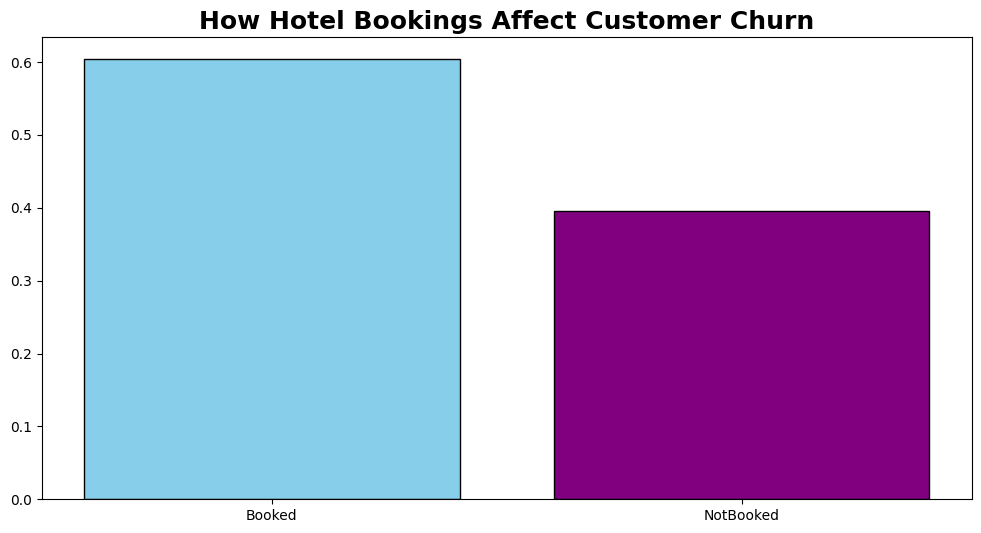

In [20]:
churn_perc = Tour_dataset['BookedHotelOrNot'].value_counts(normalize = 1)
print(churn_perc)

plt.figure(figsize=(12,6))
plt.bar(["Booked","NotBooked"], Tour_dataset['BookedHotelOrNot'].value_counts(normalize = 1), edgecolor = 'black', width = 0.8, color = ['skyblue', 'purple'])
plt.title('How Hotel Bookings Affect Customer Churn',fontsize=18,fontweight='bold')
plt.show()

# ***Annual Income Visualization***

In [21]:
income = Tour_dataset.groupby("AnnualIncomeClass")
income = income.size()
income

AnnualIncomeClass
0    159
1    386
2    409
dtype: int64

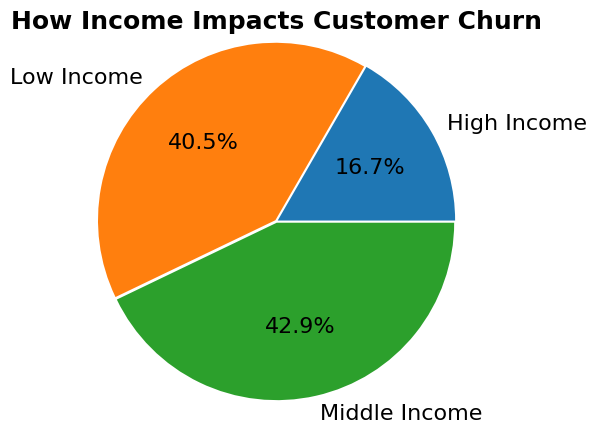

In [27]:
explode = (0.01, 0.01, 0.01)  # Explode all slices
plt.pie(income.values, labels=("High Income", "Low Income", "Middle Income"), autopct='%1.1f%%', radius=1.2, textprops={"fontsize": 16}, explode=explode)
plt.title("How Income Impacts Customer Churn", c="Black",fontsize=18,fontweight='bold')
plt.show()


## Analytical Summary

Among the total population, 60% of customers have made hotel reservations, while 39% have not. This indicates a substantial difference between the two groups.

Interestingly, customers with the highest annual income have the lowest churn rate, at 40%, compared to the highest churn rates among those with low (42%) and middle (42%) incomes.

## Insights

- The highest customer churn is observed among those who have not made hotel reservations. This could be attributed to factors such as high hotel rates or long waiting lists for reservations. Understanding these reasons can help in optimizing the campaign to reduce waiting times.

- Similarly, the highest churn rates are seen among customers with low and middle incomes. This insight can guide pricing strategies to offer competitive rates without compromising revenue, thus potentially reducing customer churn.